In [347]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
#from pylab import *
#hides the warnings
import warnings
warnings.filterwarnings('ignore')

3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
1.10.4
0.18.0


In [348]:
# this skips the first row of data
df = pandas.read_csv("C:/MIDS/Python/TeamProject/USCompanies/aff_download/SBO_2012_00CSA03_with_ann.csv", header = 1)
#df.head()


### 1.Which sectors are the biggest employers? 

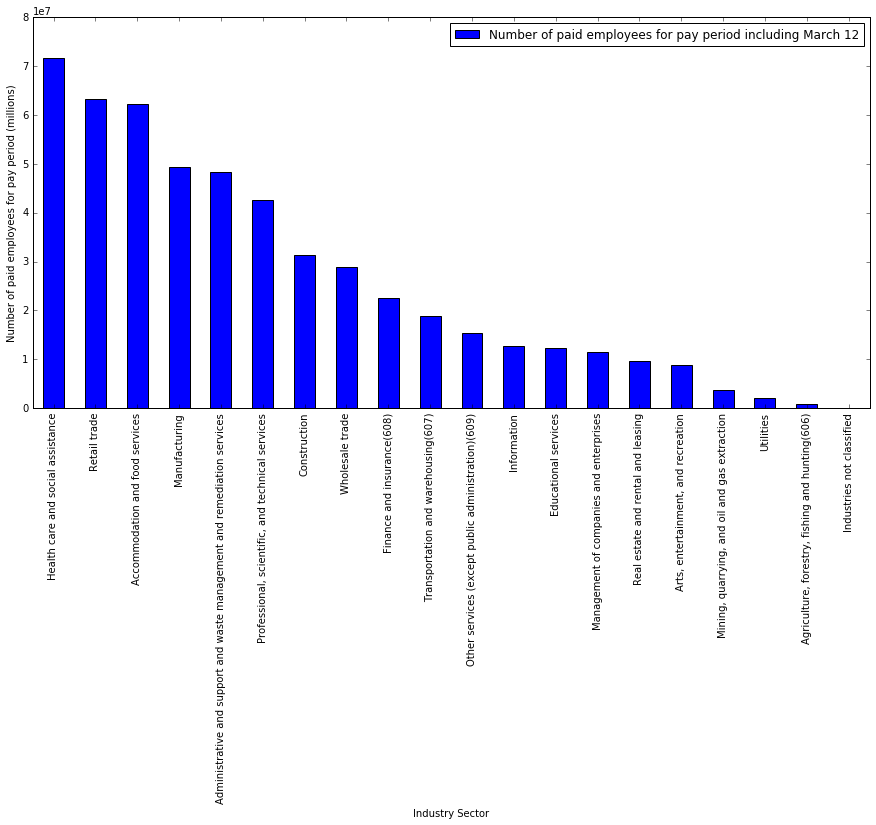

In [349]:


# create a function to convert string to numeric
to_int = lambda x : int(x) if x.isnumeric()== True else  np.nan

#slecting relevant columns from data frame for analysis
df_selected = df[['2012 NAICS code','Meaning of 2012 NAICS code','Number of paid employees for pay period including March 12']]

#converting string value to int 
# this was needed as there were character values in 'Number of paid employees for pay period including March 12' column. Now they will be NaN
df_selected['Number of paid employees for pay period including March 12'] = df_selected['Number of paid employees for pay period including March 12'].apply(to_int)

#calculating total employees by industry sector
df_selected_grouped = df_selected.groupby('Meaning of 2012 NAICS code')['Number of paid employees for pay period including March 12'].sum().to_frame()
df_selected_grouped = df_selected_grouped.reset_index() 

#scrubbing data getting rid of row with total values 
df_selected_grouped = df_selected_grouped[df_selected_grouped['Meaning of 2012 NAICS code'] != 'Total for all sectors' ]

#sorting data by industry sector
df_selected_grouped= df_selected_grouped.sort( 'Number of paid employees for pay period including March 12', ascending = 0)

#plotting data
df_selected_grouped.plot( 'Meaning of 2012 NAICS code','Number of paid employees for pay period including March 12',kind='bar', figsize=(15,7))
plt.ylabel('Number of paid employees for pay period (millions)')
plt.xlabel('Industry Sector')
plt.yscale('linear')
 

###  2.	Which sectors (NAICS Code) have the highest earnings per paid employee?   

In [350]:
#selecting relevant columns for analysis
df_selected = df[[ 'Meaning of 2012 NAICS code','Number of paid employees for pay period including March 12','Annual payroll ($1,000)']]
#df_selected
#converting string value to int 
# this was needed as there were character values in 'Number of paid employees for pay period including March 12' column. Now they will be NaN
df_selected['Number of paid employees for pay period including March 12'] = df_selected['Number of paid employees for pay period including March 12'].apply(to_int)
df_selected['Annual payroll ($1,000)'] = df_selected['Annual payroll ($1,000)'].apply(to_int)

#calculating total employees by industry sector
df_selected_grouped = df_selected.groupby('Meaning of 2012 NAICS code')['Number of paid employees for pay period including March 12','Annual payroll ($1,000)' ].sum()
df_selected_grouped = df_selected_grouped.reset_index() 

#calculating annual salary per employee
df_selected_grouped['Average Annual Salry/Employee']  = 1000 * df_selected_grouped['Annual payroll ($1,000)' ]/df_selected_grouped['Number of paid employees for pay period including March 12']

#sorting data by industry sector
df_selected_grouped= df_selected_grouped.sort( 'Average Annual Salry/Employee', ascending = 0)

#listing occupations by salary
df_selected_grouped

,Meaning of 2012 NAICS code,Number of paid employees for pay period including March 12,"Annual payroll ($1,000)",Average Annual Salry/Employee
10,Management of companies and enterprises,11416996.0,1.088458e+09,95336.608509
19,Utilities,2033550.0,1.817444e+08,89372.959603
6,Finance and insurance(608),22621713.0,1.906164e+09,84262.581441
9,Information,12691106.0,1.010076e+09,79589.294188
12,"Mining, quarrying, and oil and gas extraction",3606452.0,2.427759e+08,67317.104733
14,"Professional, scientific, and technical services",42542852.0,2.609298e+09,61333.400309
20,Wholesale trade,28931519.0,1.663354e+09,57492.799151
11,Manufacturing,49434281.0,2.486563e+09,50300.375523
4,Construction,31266965.0,1.510873e+09,48321.709702
15,Real estate and rental and leasing,9649783.0,4.151286e+08,43019.477018


### 3.	Which sectors have the highest percentage of privately held firms? Which sectors have the highest percentage of publicly held firms?     

In [426]:
# selecting relavent columns from main data frame
df_selected = df[[ 'Meaning of 2012 NAICS code','Meaning of Ethnicity code','Number of firms with or without paid employees' ]]

#scrubbing data getting rid of rows not needed for analysis
df_selected = df_selected[ (df_selected['Meaning of Ethnicity code']  == 'All firms classifiable by gender, ethnicity, race, and veteran status') 
                          | (df_selected['Meaning of Ethnicity code']  == 'Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status')]

df_selected = df_selected[df_selected['Meaning of 2012 NAICS code']!= 'Management of companies and enterprises']

#pivoting columns to rows
df_selected = df_selected.pivot('Meaning of 2012 NAICS code','Meaning of Ethnicity code', 'Number of firms with or without paid employees') 

#renaming columns 
df_selected.columns = [  'Private', 'Publically Traded']

#calculating percent publically traded
df_selected['% Publically Traded'] = 100*df_selected['Publically Traded']/(df_selected['Publically Traded'] + df_selected['Private'])
df_selected.reset_index() 

#sorting and result
df_selected.sort( '% Publically Traded', ascending = 0)

,Private,Publically Traded,% Publically Traded
Meaning of 2012 NAICS code,,,
Utilities,19398,4245,17.954574
Educational services,644290,32153,4.753246
Finance and insurance(608),920742,39772,4.140700
Real estate and rental and leasing,2579737,101205,3.774979
"Mining, quarrying, and oil and gas extraction",126134,4498,3.443260
Health care and social assistance,2479990,84122,3.280746
Information,377663,10426,2.686497
Manufacturing,573317,15674,2.661161
Wholesale trade,685212,18454,2.622551
